<a href="https://colab.research.google.com/github/corwinstites/1.125_PS4/blob/main/STITES_PS4_CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
#Import necessary modules
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
import math

In [64]:
# Read in data, replace all NaN values with 0, seperate the data into training and test data (first 600 entries is training, last 900 is testing)
data = pd.read_csv('https://raw.githubusercontent.com/corwinstites/1.125_PS4/main/train.csv')
train = data.iloc[0:600,:]
test = data.iloc[601:1459,:]
train.fillna(value = 0.0,inplace = True)
test.fillna(value = 0.0,inplace = True)

In [65]:
# Show the first entries of the train data
train.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,0.0,Reg,Lvl,AllPub,...,0,0.0,0.0,0.0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,0.0,Reg,Lvl,AllPub,...,0,0.0,0.0,0.0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,0.0,IR1,Lvl,AllPub,...,0,0.0,0.0,0.0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,0.0,IR1,Lvl,AllPub,...,0,0.0,0.0,0.0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,0.0,IR1,Lvl,AllPub,...,0,0.0,0.0,0.0,0,12,2008,WD,Normal,250000


In [66]:
# Show the first entries of the test data
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
601,602,50,RM,50.0,9000,Pave,0.0,Reg,Bnk,AllPub,...,0,0.0,0.0,0.0,0,12,2007,WD,Normal,141000
602,603,60,RL,80.0,10041,Pave,0.0,IR1,Lvl,AllPub,...,0,0.0,0.0,0.0,0,2,2006,WD,Abnorml,220000
603,604,160,FV,30.0,3182,Pave,Pave,Reg,Lvl,AllPub,...,0,0.0,0.0,0.0,0,6,2010,WD,Normal,151000
604,605,20,RL,88.0,12803,Pave,0.0,IR1,Lvl,AllPub,...,0,0.0,0.0,0.0,0,9,2008,WD,Normal,221000
605,606,60,RL,85.0,13600,Pave,0.0,Reg,Lvl,AllPub,...,0,0.0,0.0,0.0,0,10,2009,WD,Normal,205000


In [67]:
# Select only numeric value columns from the training and test data
numeric_train = train.select_dtypes(include=[np.number])
numeric_test = train.select_dtypes(include=[np.number])

In [68]:
# Find the factors best coorelating to the training data, pick the top 37 for the best result, display the features
corr = numeric_train.corr()
cols = corr['SalePrice'].sort_values(ascending=False)[0:37].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'TotRmsAbvGrd', 'FullBath', 'YearBuilt',
       'YearRemodAdd', 'Fireplaces', 'MasVnrArea', 'BsmtFinSF1', 'WoodDeckSF',
       'OpenPorchSF', '2ndFlrSF', 'HalfBath', 'GarageYrBlt', 'LotFrontage',
       'BsmtFullBath', 'LotArea', 'BsmtUnfSF', 'BedroomAbvGr', 'ScreenPorch',
       'MoSold', 'PoolArea', 'BsmtFinSF2', 'Id', '3SsnPorch', 'BsmtHalfBath',
       'LowQualFinSF', 'MiscVal', 'YrSold', 'MSSubClass', 'OverallCond',
       'KitchenAbvGr'],
      dtype='object')

In [69]:
# Assign features and results to variables (X for features, Y for results) for both training and testing data
X_train = train[cols]
X_test = test[cols]
Y_train = train['SalePrice']
Y_test = test['SalePrice']
X_train = X_train.drop(['SalePrice'], axis = 1)
X_test = X_test.drop(['SalePrice'], axis = 1)

In [70]:
# Create an LR model and predict the results of the training data based on the model
lr = linear_model.LinearRegression()
model = lr.fit(X_train, Y_train)
predictions = model.predict(X_train)

In [71]:
# Score the model's preformance on the training data
model.score(X_train,Y_train) 

0.8579156185559815

In [72]:
# Find the RME for the model's results on the training data
math.sqrt(sklearn.metrics.mean_squared_error(Y_train,predictions))

29585.377619316307

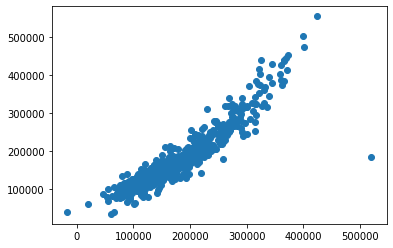

In [73]:
# Plot the model training data results against actual results
plt.scatter(predictions, Y_train)

In [74]:
# Create predictions for the testing data based on the LR model created from the training data
predictions = model.predict(X_test)

In [75]:
# Score the model's preformance on the training data
model.score(X_test,Y_test)

0.7684671500554542

In [76]:
# Find the RME for the model's results on the testing data
math.sqrt(sklearn.metrics.mean_squared_error(Y_test,predictions))

38521.52419449347

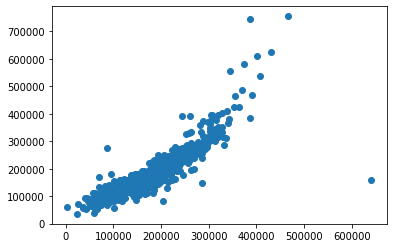

In [77]:
# Plot the model testing data results against actual results
plt.scatter(predictions, Y_test)

In [78]:
# Read in new testing data, select the relevant data to test on, replace all NaN values with 0, display the head of the data
data = pd.read_csv('https://raw.githubusercontent.com/corwinstites/1.125_PS4/main/test.csv')
test = data.iloc[:,:]
test.fillna(value = 0.0,inplace = True)
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1001,20,RL,74.0,10206,Pave,0.0,Reg,Lvl,AllPub,...,0,0,0.0,0.0,0.0,0,7,2009,WD,Normal
1,1002,30,RL,60.0,5400,Pave,0.0,Reg,Lvl,AllPub,...,0,0,0.0,0.0,0.0,0,1,2007,WD,Abnorml
2,1003,20,RL,75.0,11957,Pave,0.0,IR1,Lvl,AllPub,...,0,0,0.0,0.0,0.0,0,7,2008,WD,Normal
3,1004,90,RL,0.0,11500,Pave,0.0,IR1,Lvl,AllPub,...,0,0,0.0,0.0,0.0,0,6,2007,WD,Normal
4,1005,120,RL,43.0,3182,Pave,0.0,Reg,Lvl,AllPub,...,0,0,0.0,0.0,0.0,0,5,2009,WD,Normal


In [79]:
# Drop SalePrice from coorelating factors since it's not included in this data, use the model to predict SalePrice instead
cols = cols[1:len(cols)]
X = test[cols]
predictions = model.predict(X)

In [80]:
# Put predicitons into a data structure
input = {'ID': np.arange(1,len(predictions)+1), 'SalePrice': predictions}
predictions = pd.DataFrame(data=input)
predictions

,ID,SalePrice
0,1,51156.340103
1,2,64551.057995
2,3,256454.052470
3,4,140968.885002
4,5,213268.194466
...,...,...
455,456,178887.459426
456,457,237773.747779
457,458,222980.641422
458,459,133417.420433


In [81]:
# Save the data structure
from pathlib import Path  
predictions.to_csv('predictions.csv')